<a href="https://colab.research.google.com/github/VishalGaurav1/Predicting-Defaulting-Customers/blob/main/Pred_Default.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
! gdown --id 1PiqtIzS7XZ91bvJVfCVf-3Aw_GE0iENR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PiqtIzS7XZ91bvJVfCVf-3Aw_GE0iENR
To: /content/kisan_net_log.csv
100% 27.5M/27.5M [00:00<00:00, 114MB/s]


In [3]:
kisan=pd.read_csv('kisan_net_log.csv')
kisan.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (19,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000,...,25.0,w,INDIVIDUAL,0,0,"""0174 Michelle Gateway",NaN,NaN,NaN,NaN
1,Mendozaberg,"OK 22690""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000,...,27.0,f,INDIVIDUAL,3,0,"""1076 Carney Fort Apt. 347",NaN,NaN,NaN,NaN
3,Loganmouth,"SD 05113""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057,...,26.0,f,INDIVIDUAL,0,0,"""87025 Mark Dale Apt. 269",NaN,NaN,NaN,NaN


In [4]:
kisan1=kisan.iloc[0::2,0:27]
kisan1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000,...,16,0,36369,41.8,25.0,w,INDIVIDUAL,0,0,"""0174 Michelle Gateway"
2,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000,...,17,0,20131,53.3,27.0,f,INDIVIDUAL,3,0,"""1076 Carney Fort Apt. 347"
4,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057,...,13,0,11987,92.2,26.0,f,INDIVIDUAL,0,0,"""87025 Mark Dale Apt. 269"
6,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000,...,6,0,5472,21.5,13.0,f,INDIVIDUAL,0,0,"""823 Reid Ford"
8,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000,...,13,0,24584,69.8,43.0,f,INDIVIDUAL,1,0,"""679 Luna Roads"


Exploratory Data Analysis

In [5]:
kisan1['loan_status'].value_counts()

Fully Paid     78498
Charged Off    19294
Jun-13           125
Aug-13           107
May-13            99
               ...  
42000              1
81090              1
40000              1
85000              1
275000             1
Name: loan_status, Length: 127, dtype: int64

In [6]:
kisan2=kisan1[(kisan1['loan_status']=='Fully Paid')|((kisan1['loan_status']=='Charged Off'))]
kisan2.shape

(97792, 27)

In [7]:
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97792 entries, 0 to 200488
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             97792 non-null  object 
 1   term                  97792 non-null  object 
 2   int_rate              97792 non-null  float64
 3   installment           97792 non-null  float64
 4   grade                 97792 non-null  object 
 5   sub_grade             97792 non-null  object 
 6   emp_title             92061 non-null  object 
 7   emp_length            93190 non-null  object 
 8   home_ownership        97792 non-null  object 
 9   annual_inc            97792 non-null  object 
 10  verification_status   97792 non-null  object 
 11  issue_d               97792 non-null  object 
 12  loan_status           97792 non-null  object 
 13  purpose               97792 non-null  object 
 14  title                 97351 non-null  object 
 15  dti               

In [8]:
kisan2.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               5731
emp_length              4602
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    441
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                69
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                8868
pub_rec_bankruptcies     185
address                   10
dtype: int64

Barchart to represent percent of people who have taken loans for diferent terms and have either paid or defaulted

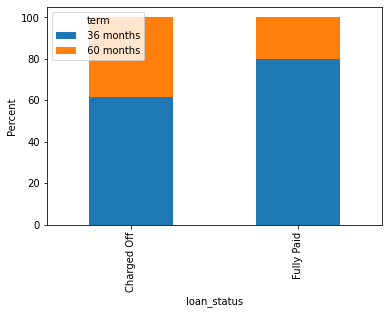

In [9]:
df=((kisan2.groupby(['loan_status','term']).size()*100)/kisan2.groupby('loan_status').size()).reset_index(name='percent')
df.pivot(index='loan_status',columns='term',values='percent').plot.bar(stacked=True)
plt.ylabel('Percent')
plt.show()

In [10]:
import re
pattern='[a-zA-Z]'
cols=['loan_amnt','annual_inc','dti','revol_bal','mort_acc']
for i in cols:
    kisan2[i]=list(map(lambda x:'nan'if re.search(pattern,str(x))else x,kisan2[i]))
    kisan2=kisan2[kisan2[i]!='nan']
kisan2.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(88741, 27)

In [11]:
cols=['loan_amnt','int_rate','installment','annual_inc','dti',
 'revol_bal','revol_util']
for i in cols:
 kisan2[i]=list(map(lambda x:float(x),kisan2[i]))
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 0 to 200488
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             88741 non-null  float64
 1   term                  88741 non-null  object 
 2   int_rate              88741 non-null  float64
 3   installment           88741 non-null  float64
 4   grade                 88741 non-null  object 
 5   sub_grade             88741 non-null  object 
 6   emp_title             83607 non-null  object 
 7   emp_length            84403 non-null  object 
 8   home_ownership        88741 non-null  object 
 9   annual_inc            88741 non-null  float64
 10  verification_status   88741 non-null  object 
 11  issue_d               88741 non-null  object 
 12  loan_status           88741 non-null  object 
 13  purpose               88741 non-null  object 
 14  title                 88302 non-null  object 
 15  dti               

In [12]:
kisan2['title'].value_counts()

Debt consolidation                  37962
Credit card refinancing             12970
Home improvement                     3865
Other                                3179
Debt Consolidation                   2191
                                    ...  
Credit Card and Medical Expenses        1
Home remodeling                         1
Getting a relief                        1
PayOffs For Good                        1
Credit card paid off                    1
Name: title, Length: 10289, dtype: int64

In [13]:
kisan2['purpose'].value_counts()

debt_consolidation    53511
credit_card           19352
home_improvement       5359
other                  4275
major_purchase         1723
small_business          939
medical                 889
car                     808
moving                  599
vacation                549
house                   468
wedding                 215
renewable_energy         53
educational               1
Name: purpose, dtype: int64

Boxplot for Loan Status and Loan Amount

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


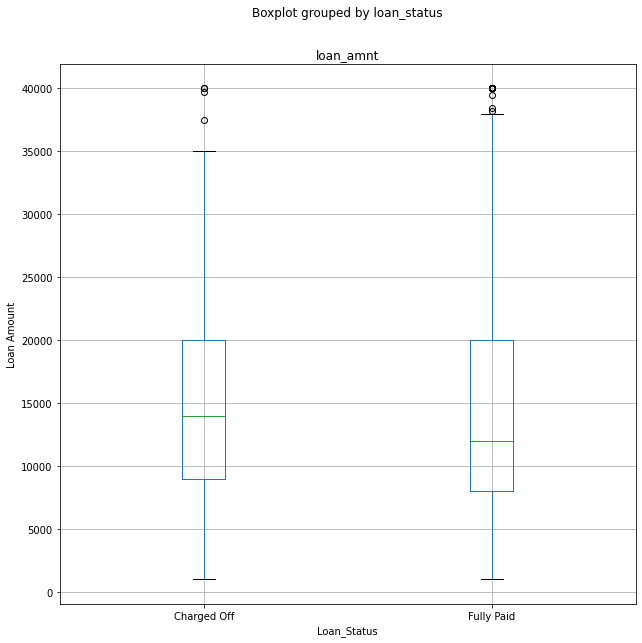

In [14]:
kisan2.boxplot(by='loan_status',column='loan_amnt',figsize=(10,10))
plt.xlabel('Loan_Status')
plt.ylabel('Loan Amount')
plt.show()

Boxplot For Loan Status and Annual Income

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


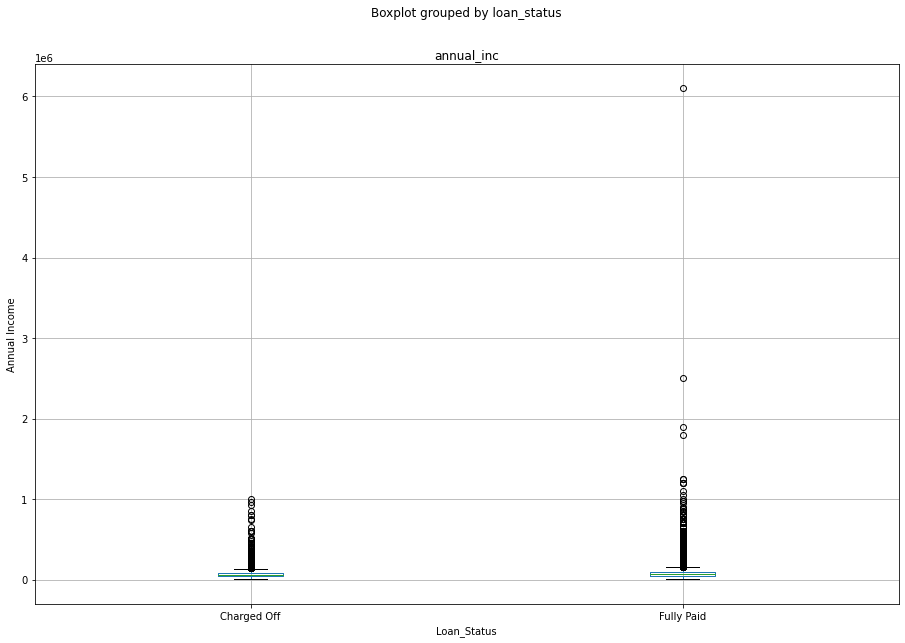

In [15]:
kisan2.boxplot(by='loan_status',column='annual_inc',figsize=(15,10))
plt.xlabel('Loan_Status')
plt.ylabel('Annual Income')
plt.show()

Aggregating Purpose into Debt_Consolidation,Credit_Card and Others

In [16]:
z=['debt_consolidation','credit_card']
kisan2['purpose']=list(map(lambda x:x if x in z else 'others',kisan2['purpose']))
kisan2['purpose'].value_counts()

debt_consolidation    53511
credit_card           19352
others                15878
Name: purpose, dtype: int64

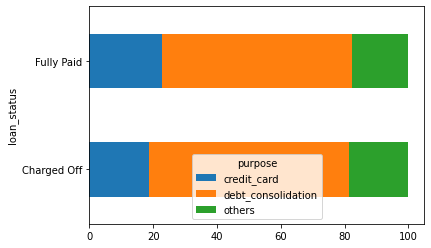

In [17]:
df=((kisan2.groupby(['loan_status', 'purpose']).size()/kisan2.groupby('loan_status').size())*100).reset_index(name='percent')
df.pivot(index='loan_status',columns='purpose',values='percent').plot.barh(stacked=True)
plt.show()

In [18]:
kisan2['home_ownership'].value_counts()

MORTGAGE    45023
RENT        35083
OWN          8613
OTHER          13
NONE            7
ANY             2
Name: home_ownership, dtype: int64

Aggregating home_ownership into Mortgage,Rent and Others

In [19]:
z=['MORTGAGE','RENT']
kisan2['home_ownership']=list(map(lambda x:x if x in z else 'OTHERS',kisan2['home_ownership']))
kisan2['home_ownership'].value_counts()

MORTGAGE    45023
RENT        35083
OTHERS       8635
Name: home_ownership, dtype: int64

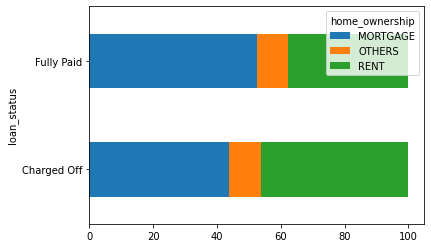

In [20]:
df=((kisan2.groupby(['loan_status', 'home_ownership']).size()/kisan2.groupby('loan_status').size())*100).reset_index(name='percent')
df.pivot(index='loan_status',columns='home_ownership',values='percent').plot.barh(stacked=True)
plt.show()

In [21]:
kisan2['verification_status'].value_counts()

Verified           31144
Source Verified    30265
Not Verified       27332
Name: verification_status, dtype: int64

In [22]:
values=['Verified','Not Verified']
kisan2['verification_status']=list(map(lambda x:x if x in values else 'Verified',kisan2['verification_status']))
kisan2['verification_status'].value_counts()

Verified        61409
Not Verified    27332
Name: verification_status, dtype: int64

In [23]:
kisan2['pub_rec'].value_counts()

0     74769
1     11950
2      1393
3       360
4       147
5        63
6        27
8        15
7         8
10        3
9         2
11        2
19        1
13        1
Name: pub_rec, dtype: int64

In [24]:
kisan2['pub_rec'].isnull().sum()

0

In [25]:
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 0 to 200488
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             88741 non-null  float64
 1   term                  88741 non-null  object 
 2   int_rate              88741 non-null  float64
 3   installment           88741 non-null  float64
 4   grade                 88741 non-null  object 
 5   sub_grade             88741 non-null  object 
 6   emp_title             83607 non-null  object 
 7   emp_length            84403 non-null  object 
 8   home_ownership        88741 non-null  object 
 9   annual_inc            88741 non-null  float64
 10  verification_status   88741 non-null  object 
 11  issue_d               88741 non-null  object 
 12  loan_status           88741 non-null  object 
 13  purpose               88741 non-null  object 
 14  title                 88302 non-null  object 
 15  dti               

In [26]:
kisan2['pub_rec']=list(map(lambda x:x if x=='0' else '1',kisan2['pub_rec']))
kisan2['pub_rec'].value_counts()

0    74769
1    13972
Name: pub_rec, dtype: int64

In [27]:
kisan2['pub_rec']=list(map(lambda x:int(x),kisan2['pub_rec']))
kisan2['pub_rec'].value_counts()

0    74769
1    13972
Name: pub_rec, dtype: int64

In [28]:
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 0 to 200488
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             88741 non-null  float64
 1   term                  88741 non-null  object 
 2   int_rate              88741 non-null  float64
 3   installment           88741 non-null  float64
 4   grade                 88741 non-null  object 
 5   sub_grade             88741 non-null  object 
 6   emp_title             83607 non-null  object 
 7   emp_length            84403 non-null  object 
 8   home_ownership        88741 non-null  object 
 9   annual_inc            88741 non-null  float64
 10  verification_status   88741 non-null  object 
 11  issue_d               88741 non-null  object 
 12  loan_status           88741 non-null  object 
 13  purpose               88741 non-null  object 
 14  title                 88302 non-null  object 
 15  dti               

In [29]:
kisan2['term'].value_counts()

 36 months    67798
 60 months    20943
Name: term, dtype: int64

In [30]:
kisan2['is_36mnths']=list(map(lambda x:1 if x==' 36 months'else 0,kisan2['term']))
kisan2['is_36mnths'].value_counts()

1    67798
0    20943
Name: is_36mnths, dtype: int64

In [31]:
kisan2['is_verified']=list(map(lambda x:1 if x=='Verified'else 0,kisan2['verification_status']))
kisan2['is_verified'].value_counts()

1    61409
0    27332
Name: is_verified, dtype: int64

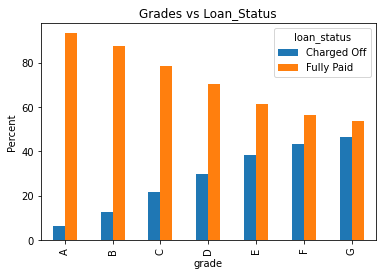

In [32]:
df=((kisan2.groupby(['grade','loan_status']).size()*100)/kisan2.groupby('grade').size()).reset_index(name='percent')
df.pivot(index='grade',columns='loan_status',values='percent').plot.bar()
plt.ylabel('Percent')
plt.title('Grades vs Loan_Status')
plt.show()

In [33]:
kisan2=pd.get_dummies(kisan2,columns=['home_ownership','purpose'],drop_first=True)
kisan2

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,annual_inc,verification_status,...,application_type,mort_acc,pub_rec_bankruptcies,address,is_36mnths,is_verified,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,117000.0,Not Verified,...,INDIVIDUAL,0,0,"""0174 Michelle Gateway",1,0,0,1,0,1
2,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,65000.0,Not Verified,...,INDIVIDUAL,3,0,"""1076 Carney Fort Apt. 347",1,0,0,0,1,0
4,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,43057.0,Verified,...,INDIVIDUAL,0,0,"""87025 Mark Dale Apt. 269",1,1,0,1,0,0
6,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,54000.0,Not Verified,...,INDIVIDUAL,0,0,"""823 Reid Ford",1,0,0,1,0,0
8,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,55000.0,Verified,...,INDIVIDUAL,1,0,"""679 Luna Roads",0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200480,15450.0,36 months,7.90,483.44,A,A4,Law enforcement,2 years,42000.0,Not Verified,...,INDIVIDUAL,0,0,"""927 Brady Rest",1,0,1,0,1,0
200482,15000.0,36 months,12.29,500.30,C,C1,NaN,NaN,60000.0,Verified,...,INDIVIDUAL,0,0,"""10095 Moore Parkway",1,1,1,0,1,0
200484,6000.0,36 months,9.99,193.58,B,B3,NaN,NaN,16980.0,Verified,...,INDIVIDUAL,0,1,"""476 Rivera Fall Suite 495",1,1,1,0,1,0
200486,5000.0,36 months,13.53,169.75,B,B5,Deputy sheriff,10+ years,43000.0,Verified,...,INDIVIDUAL,4,0,"""USCGC Martinez",1,1,0,0,0,1


In [34]:
kisan2.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'is_36mnths', 'is_verified',
       'home_ownership_OTHERS', 'home_ownership_RENT',
       'purpose_debt_consolidation', 'purpose_others'],
      dtype='object')

In [35]:
cols=['home_ownership_OTHERS','home_ownership_RENT','purpose_debt_consolidation',
 'purpose_others']
for i in cols:
 kisan2[i]=list(map(lambda x:int(x),kisan2[i]))
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 0 to 200488
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   88741 non-null  float64
 1   term                        88741 non-null  object 
 2   int_rate                    88741 non-null  float64
 3   installment                 88741 non-null  float64
 4   grade                       88741 non-null  object 
 5   sub_grade                   88741 non-null  object 
 6   emp_title                   83607 non-null  object 
 7   emp_length                  84403 non-null  object 
 8   annual_inc                  88741 non-null  float64
 9   verification_status         88741 non-null  object 
 10  issue_d                     88741 non-null  object 
 11  loan_status                 88741 non-null  object 
 12  title                       88302 non-null  object 
 13  dti                         88

In [36]:
kisan2['application_type'].value_counts(normalize=True)

INDIVIDUAL    0.998073
JOINT         0.001127
DIRECT_PAY    0.000800
Name: application_type, dtype: float64

In [37]:
kisan2['initial_list_status'].value_counts(normalize=True)

f    0.555775
w    0.444225
Name: initial_list_status, dtype: float64

In [38]:
d={'f':0,'w':1}
kisan2['initial_list_status']=list(map(lambda x:d[x] ,kisan2['initial_list_status']))
kisan2['initial_list_status'].value_counts()

0    49320
1    39421
Name: initial_list_status, dtype: int64

In [39]:
kisan2['pub_rec_bankruptcies'].value_counts()

0    77846
1    10303
2      475
3       79
4       25
5        8
6        4
7        1
Name: pub_rec_bankruptcies, dtype: int64

In [40]:
kisan2['pub_rec_bankruptcies']=list(map(lambda x:str(x),kisan2['pub_rec_bankruptcies']))
kisan2['pub_rec_bankruptcies'].value_counts()

0    77846
1    10303
2      475
3       79
4       25
5        8
6        4
7        1
Name: pub_rec_bankruptcies, dtype: int64

In [41]:
kisan2['pub_rec_bankruptcies']=list(map(lambda x:x if x=='0'  else '1',kisan2['pub_rec_bankruptcies']))
kisan2['pub_rec_bankruptcies'].value_counts()

0    77846
1    10895
Name: pub_rec_bankruptcies, dtype: int64

In [42]:
kisan2['pub_rec_bankruptcies']=list(map(lambda x:int(x),kisan2['pub_rec_bankruptcies']))
kisan2['pub_rec_bankruptcies'].value_counts()

0    77846
1    10895
Name: pub_rec_bankruptcies, dtype: int64

In [43]:
kisan2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88741 entries, 0 to 200488
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   88741 non-null  float64
 1   term                        88741 non-null  object 
 2   int_rate                    88741 non-null  float64
 3   installment                 88741 non-null  float64
 4   grade                       88741 non-null  object 
 5   sub_grade                   88741 non-null  object 
 6   emp_title                   83607 non-null  object 
 7   emp_length                  84403 non-null  object 
 8   annual_inc                  88741 non-null  float64
 9   verification_status         88741 non-null  object 
 10  issue_d                     88741 non-null  object 
 11  loan_status                 88741 non-null  object 
 12  title                       88302 non-null  object 
 13  dti                         88

In [44]:
kisan3=kisan2.dropna()
kisan3.shape

(83135, 31)

In [45]:
kisan3.shape

(83135, 31)

In [46]:
XS=kisan3[['loan_amnt','int_rate', 'installment','sub_grade','grade',
 'annual_inc','is_verified','dti','open_acc', 'pub_rec',
 'revol_bal', 'revol_util', 'total_acc','initial_list_status',
 'mort_acc','pub_rec_bankruptcies','is_36mnths',
 'home_ownership_OTHERS', 'home_ownership_RENT',
 'purpose_debt_consolidation', 'purpose_others']]

In [47]:
XS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83135 entries, 0 to 200488
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   83135 non-null  float64
 1   int_rate                    83135 non-null  float64
 2   installment                 83135 non-null  float64
 3   sub_grade                   83135 non-null  object 
 4   grade                       83135 non-null  object 
 5   annual_inc                  83135 non-null  float64
 6   is_verified                 83135 non-null  int64  
 7   dti                         83135 non-null  float64
 8   open_acc                    83135 non-null  object 
 9   pub_rec                     83135 non-null  int64  
 10  revol_bal                   83135 non-null  float64
 11  revol_util                  83135 non-null  float64
 12  total_acc                   83135 non-null  float64
 13  initial_list_status         83

In [48]:
cols=['open_acc','mort_acc']
for i in cols:
  XS[i]=list(map(lambda x:int(x),XS[i]))
XS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83135 entries, 0 to 200488
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   83135 non-null  float64
 1   int_rate                    83135 non-null  float64
 2   installment                 83135 non-null  float64
 3   sub_grade                   83135 non-null  object 
 4   grade                       83135 non-null  object 
 5   annual_inc                  83135 non-null  float64
 6   is_verified                 83135 non-null  int64  
 7   dti                         83135 non-null  float64
 8   open_acc                    83135 non-null  int64  
 9   pub_rec                     83135 non-null  int64  
 10  revol_bal                   83135 non-null  float64
 11  revol_util                  83135 non-null  float64
 12  total_acc                   83135 non-null  float64
 13  initial_list_status         83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
y=kisan3['loan_status']
y

0          Fully Paid
2          Fully Paid
4          Fully Paid
6          Fully Paid
8         Charged Off
             ...     
200476     Fully Paid
200478     Fully Paid
200480     Fully Paid
200486     Fully Paid
200488     Fully Paid
Name: loan_status, Length: 83135, dtype: object

In [50]:
kisan3['y_obs']=list(map(lambda x:0 if x=='Fully Paid' else 1,kisan3['loan_status']))
kisan3[['loan_status','y_obs']].head(14)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,loan_status,y_obs
0,Fully Paid,0
2,Fully Paid,0
4,Fully Paid,0
6,Fully Paid,0
8,Charged Off,1
10,Fully Paid,0
12,Fully Paid,0
14,Fully Paid,0
16,Fully Paid,0
18,Fully Paid,0


In [51]:
y=kisan3['y_obs']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_trainn,x_test,y_trainn,y_test=train_test_split(XS,y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.15,random_state=42)

In [54]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(60064, 21) (10600, 21) (12471, 21) (60064,) (10600,) (12471,)


In [55]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [56]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [57]:
XS.columns

Index(['loan_amnt', 'int_rate', 'installment', 'sub_grade', 'grade',
       'annual_inc', 'is_verified', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'mort_acc',
       'pub_rec_bankruptcies', 'is_36mnths', 'home_ownership_OTHERS',
       'home_ownership_RENT', 'purpose_debt_consolidation', 'purpose_others'],
      dtype='object')

Performing Target Encoding on Grade and Sub-Grade

In [58]:
ce_target=ce.TargetEncoder(cols=['grade','sub_grade'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [59]:
x_train

,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
41364,18075.0,14.33,620.67,0.170407,0.212574,61000.00,1,15.84,27,0,...,65.5,45.0,0,1,0,1,0,0,1,0
77418,35000.0,17.14,872.48,0.320043,0.294368,269156.00,0,1.69,5,1,...,33.8,23.0,1,7,1,0,0,0,0,1
81476,3000.0,15.61,104.90,0.256257,0.294368,36000.00,1,31.00,9,0,...,51.7,15.0,0,0,0,1,0,1,0,1
27492,5000.0,10.99,163.67,0.109393,0.122275,45000.00,1,26.70,19,0,...,52.2,45.0,0,1,0,1,0,0,0,0
87626,8000.0,7.89,250.29,0.082898,0.061363,95000.00,0,4.33,13,0,...,22.7,42.0,1,6,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134090,4000.0,18.25,145.12,0.306399,0.294368,15000.00,1,30.00,7,0,...,52.6,15.0,0,3,0,1,0,0,0,1
9180,21000.0,13.11,479.00,0.123631,0.122275,120000.00,1,14.20,17,0,...,71.9,41.0,0,6,0,0,0,0,1,0
32844,11500.0,13.67,391.21,0.155393,0.122275,25363.68,1,11.45,5,0,...,82.5,10.0,0,0,0,1,0,1,1,0
74074,10000.0,14.33,343.39,0.170407,0.212574,62000.00,1,5.90,10,1,...,74.0,33.0,1,2,1,1,0,1,1,0


Standarisation of the Features

In [60]:
cols=['loan_amnt','int_rate','installment','annual_inc','dti',
 'open_acc','revol_bal','revol_util','total_acc','mort_acc']
d={}
for i in cols:
    mean_i=x_train[i].mean()
    std_i=x_train[i].std()
    x_train[i]=(x_train[i]-mean_i)/std_i
    d[i]=[mean_i,std_i]
x_train

,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
41364,0.431600,0.119301,0.707463,0.170407,0.212574,-0.297086,1,-0.226418,2.970394,0,...,0.470989,1.608355,0,-0.374441,0,1,0,0,1,0
77418,2.452470,0.745380,1.710117,0.320043,0.294368,4.029263,0,-1.969776,-1.267746,1,...,-0.855154,-0.239373,1,2.437328,1,0,0,0,0,1
81476,-1.368378,0.404490,-1.346223,0.256257,0.294368,-0.816690,1,1.641377,-0.497175,0,...,-0.106322,-0.911273,0,-0.843069,0,1,0,1,0,1
27492,-1.129575,-0.624863,-1.112213,0.109393,0.122275,-0.629632,1,1.111594,1.429252,0,...,-0.085405,1.608355,0,-0.374441,0,1,0,0,0,0
87626,-0.771370,-1.315554,-0.767311,0.082898,0.061363,0.409576,0,-1.644514,0.273396,0,...,-1.319514,1.356392,1,1.968700,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134090,-1.248976,0.992692,-1.186075,0.306399,0.294368,-1.253157,1,1.518172,-0.882460,0,...,-0.068672,-0.911273,0,0.562816,0,1,0,0,0,1
9180,0.780849,-0.152519,0.143364,0.123631,0.122275,0.929180,1,-0.428475,1.043967,0,...,0.738728,1.272404,0,1.968700,0,0,0,0,1,0
32844,-0.353465,-0.027749,-0.206197,0.155393,0.122275,-1.037757,1,-0.767291,-1.267746,0,...,1.182171,-1.331211,0,-0.843069,0,1,0,1,1,0
74074,-0.532567,0.119301,-0.396606,0.170407,0.212574,-0.276301,1,-1.451081,-0.304532,1,...,0.826580,0.600504,1,0.094187,1,1,0,1,1,0


In [61]:
for i in cols:
  x_val[i]=(x_val[i]-d[i][0])/d[i][1]
  x_test[i]=(x_test[i]-d[i][0])/d[i][1]
x_test

,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
168070,-1.010173,0.883518,-0.903050,0.256257,0.294368,-0.627242,1,-0.503631,-0.111890,0,...,0.814030,-0.995261,0,-0.843069,0,1,1,0,1,0
175254,1.616660,-1.627479,1.652660,0.043807,0.061363,1.137022,1,0.924321,1.814537,0,...,0.709444,1.692342,0,0.094187,0,1,0,0,1,0
29248,1.139054,-1.315554,1.225852,0.082898,0.061363,1.137022,0,0.002744,0.273396,0,...,0.052647,0.264553,1,0.562816,0,1,0,0,1,0
175162,-0.272869,0.446823,-0.064326,0.220937,0.212574,-0.837474,1,1.974032,0.080753,0,...,0.245085,0.432528,0,-0.843069,0,1,0,1,0,0
48540,1.855463,-0.027749,2.299621,0.220937,0.212574,-0.068460,1,-1.438761,0.080753,0,...,-0.549765,0.516516,1,0.094187,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57916,-0.699730,-1.204152,-0.684649,0.082898,0.061363,0.492713,0,-1.375926,-0.882460,0,...,-1.260946,-0.407348,1,0.562816,0,1,1,0,0,0
143462,-1.129575,-0.103502,-1.089915,0.220937,0.212574,-0.879042,1,-0.385354,3.355679,1,...,1.696731,1.020442,0,-0.843069,0,1,0,1,1,0
85076,2.452470,0.041320,2.997827,0.170407,0.212574,0.929180,1,1.864379,0.080753,0,...,0.508640,0.096578,0,-0.374441,0,1,0,0,0,1
59534,-0.413166,0.841185,-0.189872,0.320043,0.294368,-0.514945,1,1.100505,1.429252,1,...,-0.315493,0.012590,0,0.094187,1,1,0,0,1,0


In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
y_train.value_counts(normalize=True)

0    0.801445
1    0.198555
Name: y_obs, dtype: float64

In [64]:
from sklearn import metrics

Making a Logistic Regression Model

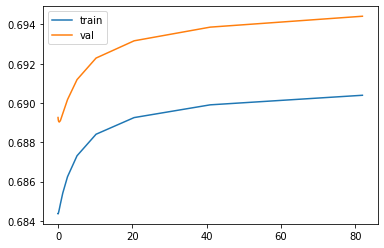

In [65]:
train_cost=[]
val_cost=[]
lambdaa=[]
l=0.01
while l<=100:
  lambdaa.append(l)
  model=LogisticRegression(C=1/l,class_weight={0:0.1,1:0.5},max_iter=500)
  model.fit(x_train,y_train)
  y_train_probs=model.predict_proba(x_train)
  y_val_probs=model.predict_proba(x_val)
  train_loss=metrics.log_loss(y_train,y_train_probs)
  val_loss=metrics.log_loss(y_val,y_val_probs)
  train_cost.append(train_loss)
  val_cost.append(val_loss)
  l*=2
plt.plot(lambdaa,train_cost,label='train')
plt.plot(lambdaa,val_cost,label='val')
plt.legend()
plt.show()


In [66]:
z=np.argmin(val_cost)
lbest=0.01*(2**z)
lbest

0.32

In [67]:
model=LogisticRegression(C=1/lbest,class_weight={0:0.1,1:0.5},max_iter=500)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))


0.6085175812466702
0.6017924528301887
0.6125410953411916


In [68]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred=model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[5878, 4128],
       [ 704, 1761]])

In [69]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.29903209373408046
0.7144016227180527


Removing the outliers which are on the wrong side of the plane theta_T*x+theta_not

In [70]:
z=np.array(list(model.intercept_)+list(model.coef_[0]))
z=z.T
z

array([-1.18301242, -0.09650479, -0.29099025,  0.16941001,  5.88681228,
        1.20578914, -0.10099467,  0.09044842,  0.18659154,  0.12380857,
        0.08806162, -0.06664212,  0.10399329, -0.11620505, -0.05037909,
       -0.06811848, -0.08659769, -0.52070181,  0.10977775,  0.27586991,
        0.04856874,  0.12837232])

In [71]:
x_train.insert(0,'x_not',1)

In [72]:
x_train

,x_not,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
41364,1,0.431600,0.119301,0.707463,0.170407,0.212574,-0.297086,1,-0.226418,2.970394,...,0.470989,1.608355,0,-0.374441,0,1,0,0,1,0
77418,1,2.452470,0.745380,1.710117,0.320043,0.294368,4.029263,0,-1.969776,-1.267746,...,-0.855154,-0.239373,1,2.437328,1,0,0,0,0,1
81476,1,-1.368378,0.404490,-1.346223,0.256257,0.294368,-0.816690,1,1.641377,-0.497175,...,-0.106322,-0.911273,0,-0.843069,0,1,0,1,0,1
27492,1,-1.129575,-0.624863,-1.112213,0.109393,0.122275,-0.629632,1,1.111594,1.429252,...,-0.085405,1.608355,0,-0.374441,0,1,0,0,0,0
87626,1,-0.771370,-1.315554,-0.767311,0.082898,0.061363,0.409576,0,-1.644514,0.273396,...,-1.319514,1.356392,1,1.968700,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134090,1,-1.248976,0.992692,-1.186075,0.306399,0.294368,-1.253157,1,1.518172,-0.882460,...,-0.068672,-0.911273,0,0.562816,0,1,0,0,0,1
9180,1,0.780849,-0.152519,0.143364,0.123631,0.122275,0.929180,1,-0.428475,1.043967,...,0.738728,1.272404,0,1.968700,0,0,0,0,1,0
32844,1,-0.353465,-0.027749,-0.206197,0.155393,0.122275,-1.037757,1,-0.767291,-1.267746,...,1.182171,-1.331211,0,-0.843069,0,1,0,1,1,0
74074,1,-0.532567,0.119301,-0.396606,0.170407,0.212574,-0.276301,1,-1.451081,-0.304532,...,0.826580,0.600504,1,0.094187,1,1,0,1,1,0


In [73]:
z2=x_train.dot(z)
z3=1/(1+np.exp(-z2))
z3

41364     0.493096
77418     0.463053
81476     0.716637
27492     0.392416
87626     0.192294
            ...   
134090    0.669328
9180      0.379719
32844     0.484904
74074     0.407216
56072     0.887406
Length: 60064, dtype: float64

In [74]:
x_train['log_loss']=-1*(y_train*np.log(z3)+(1-y_train)*(1-np.log(z3)))

In [75]:
x_train['log_loss'].describe()

count    60064.000000
mean        -1.330839
std          0.993246
min         -5.537985
25%         -1.974127
50%         -1.643565
75%         -1.273849
max          2.629999
Name: log_loss, dtype: float64

In [76]:
x_train=pd.concat([x_train,y_train],axis=1)

In [77]:
q05=x_train['log_loss'].quantile(0.05)
q95=x_train['log_loss'].quantile(0.95)
x_train=x_train[(x_train['log_loss']>q05)&(x_train['log_loss']<q95)]

In [78]:
y_train=x_train['y_obs']
y_train

41364     0
81476     1
27492     0
181934    0
104402    0
         ..
8424      0
134090    0
32844     0
74074     0
56072     1
Name: y_obs, Length: 54056, dtype: int64

In [79]:
x_train=x_train.drop(['x_not','y_obs','log_loss'],axis=1)

Performing LogisticRegression after removing outliers

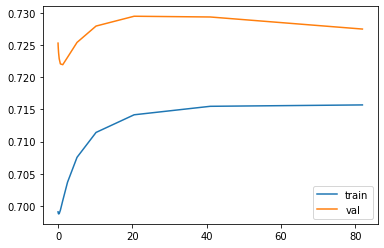

In [80]:
train_cost=[]
val_cost=[]
lambdaa=[]
l=0.01
while l<=100:
  lambdaa.append(l)
  model=LogisticRegression(C=1/l,class_weight={0:0.1,1:0.9},max_iter=500)
  model.fit(x_train,y_train)
  y_train_probs=model.predict_proba(x_train)
  y_val_probs=model.predict_proba(x_val)
  train_loss=metrics.log_loss(y_train,y_train_probs)
  val_loss=metrics.log_loss(y_val,y_val_probs)
  train_cost.append(train_loss)
  val_cost.append(val_loss)
  l*=2
plt.plot(lambdaa,train_cost,label='train')
plt.plot(lambdaa,val_cost,label='val')
plt.legend()
plt.show()

In [81]:
z=np.argmin(val_cost)
lbest=0.01*(2**(z))
lbest

1.28

In [82]:
model=LogisticRegression(C=1/lbest,class_weight={0:0.1,1:0.9},max_iter=500)
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))

0.6630531300873168
0.639811320754717
0.6491861117793281


In [83]:
ypred=model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[6467, 3539],
       [ 836, 1629]])

In [84]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.31520897832817335
0.6608519269776876


Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
x_trainn,x_test,y_trainn,y_test=train_test_split(XS,y,test_size=0.15,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_trainn,y_trainn,test_size=0.15,random_state=42)

In [87]:
print(x_train.shape,x_val.shape,x_test.shape,y_train.shape,
     y_val.shape,y_test.shape)

(60064, 21) (10600, 21) (12471, 21) (60064,) (10600,) (12471,)


In [88]:
ce_target=ce.TargetEncoder(cols=['grade','sub_grade'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [89]:
x_train

,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
41364,18075.0,14.33,620.67,0.170407,0.212574,61000.00,1,15.84,27,0,...,65.5,45.0,0,1,0,1,0,0,1,0
77418,35000.0,17.14,872.48,0.320043,0.294368,269156.00,0,1.69,5,1,...,33.8,23.0,1,7,1,0,0,0,0,1
81476,3000.0,15.61,104.90,0.256257,0.294368,36000.00,1,31.00,9,0,...,51.7,15.0,0,0,0,1,0,1,0,1
27492,5000.0,10.99,163.67,0.109393,0.122275,45000.00,1,26.70,19,0,...,52.2,45.0,0,1,0,1,0,0,0,0
87626,8000.0,7.89,250.29,0.082898,0.061363,95000.00,0,4.33,13,0,...,22.7,42.0,1,6,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134090,4000.0,18.25,145.12,0.306399,0.294368,15000.00,1,30.00,7,0,...,52.6,15.0,0,3,0,1,0,0,0,1
9180,21000.0,13.11,479.00,0.123631,0.122275,120000.00,1,14.20,17,0,...,71.9,41.0,0,6,0,0,0,0,1,0
32844,11500.0,13.67,391.21,0.155393,0.122275,25363.68,1,11.45,5,0,...,82.5,10.0,0,0,0,1,0,1,1,0
74074,10000.0,14.33,343.39,0.170407,0.212574,62000.00,1,5.90,10,1,...,74.0,33.0,1,2,1,1,0,1,1,0


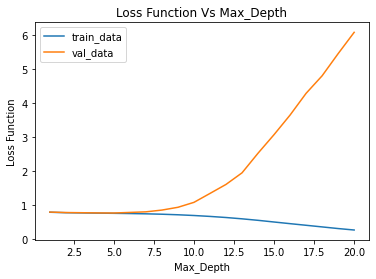

In [90]:

train_cost=[]
val_cost=[]
depth=1
maxdepth=[]
while depth<=20:
    model=DecisionTreeClassifier(random_state=0,max_depth=depth,class_weight={0:0.1,1:0.6})
    model.fit(x_train,y_train)
    y_train_probs=model.predict_proba(x_train)
    y_val_probs=model.predict_proba(x_val)
    train_loss=metrics.log_loss(y_train,y_train_probs)
    val_loss=metrics.log_loss(y_val,y_val_probs)
    train_cost.append(train_loss)
    val_cost.append(val_loss)
    maxdepth.append(depth)
    depth+=1
plt.plot(maxdepth,train_cost,label='train_data')
plt.plot(maxdepth,val_cost,label='val_data')
plt.xlabel('Max_Depth')
plt.ylabel('Loss Function')
plt.title('Loss Function Vs Max_Depth')
plt.legend()
plt.show()

In [91]:
z=np.argmin(val_cost)
depth_best=z+1

In [92]:
model=DecisionTreeClassifier(max_depth=depth_best,class_weight={0:0.1,1:0.6})
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
print(model.score(x_val,y_val))
print(model.score(x_test,y_test))

0.5481319925412893
0.5369811320754717
0.5481517119717745


In [93]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
ypred=model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[4919, 5087],
       [ 548, 1917]])

In [94]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.2737007424328955
0.7776876267748478


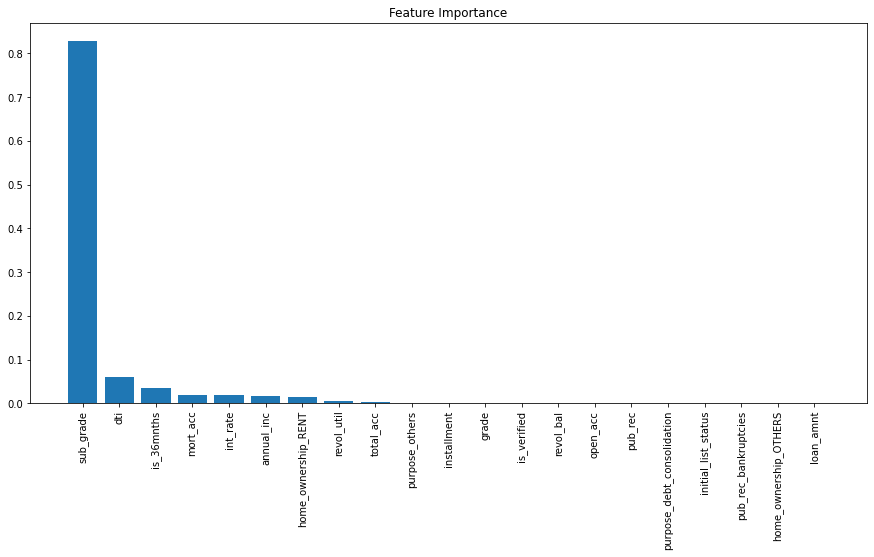

In [95]:
# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [x_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(x_train.shape[1]), importances[indices]) 
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

Ensemples
1)BaggingClassifier

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
x_train,x_test,y_train,y_test=train_test_split(XS,y,test_size=0.15,random_state=42)

In [98]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(70664, 21) (12471, 21) (70664,) (12471,)


In [99]:
ce_target=ce.TargetEncoder(cols=['grade','sub_grade'])
x_train=ce_target.fit_transform(x_train,y_train)
x_val=ce_target.transform(x_val)
x_test=ce_target.transform(x_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [100]:
x_train

,loan_amnt,int_rate,installment,sub_grade,grade,annual_inc,is_verified,dti,open_acc,pub_rec,...,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,is_36mnths,home_ownership_OTHERS,home_ownership_RENT,purpose_debt_consolidation,purpose_others
188918,7550.0,11.99,250.74,0.121014,0.123050,58000.0,1,15.04,13,0,...,76.9,36.0,0,6,0,1,0,0,0,0
33308,35000.0,22.15,969.65,0.409915,0.377368,186830.0,1,4.14,5,0,...,8.9,20.0,1,5,0,0,0,0,1,0
145410,16225.0,25.89,484.73,0.509434,0.472119,102000.0,1,14.08,8,0,...,54.2,16.0,1,3,0,0,0,1,0,1
93300,20000.0,8.19,628.49,0.081124,0.060600,75000.0,1,26.16,16,0,...,39.7,30.0,0,2,0,1,0,0,0,0
111234,7000.0,5.32,210.81,0.028554,0.060600,85000.0,1,14.25,9,0,...,13.0,17.0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,35000.0,16.49,860.28,0.300092,0.293317,121000.0,1,25.61,24,0,...,64.6,38.0,0,3,0,0,1,0,1,0
132272,14000.0,14.49,481.83,0.240697,0.212023,80000.0,1,18.30,15,0,...,89.0,27.0,0,4,0,1,0,0,1,0
185334,10000.0,6.03,304.36,0.028554,0.060600,135000.0,0,3.58,10,0,...,3.1,30.0,1,7,0,1,0,0,0,1
2020,10625.0,13.11,358.57,0.127305,0.123050,50000.0,1,15.84,22,0,...,47.0,39.0,1,1,0,1,1,0,0,0


In [101]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold,cross_validate

In [102]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [103]:
rf_model=RandomForestClassifier(random_state=1,class_weight={0:0.1,1:0.6})
fold=KFold(n_splits=5)
params={'n_estimators':[51,101],
        'max_depth':[5,8,12,15,20],
        'max_samples':[0.60,0.80],
        'max_features':[0.60,0.80]}

In [104]:
clf=RandomizedSearchCV(rf_model,params,cv=fold,scoring='f1',n_jobs=-1)

In [105]:
clf.fit(x_train,y_train)


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(class_weight={0: 0.1,
                                                                  1: 0.6},
                                                    random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 15, 20],
                                        'max_features': [0.6, 0.8],
                                        'max_samples': [0.6, 0.8],
                                        'n_estimators': [51, 101]},
                   scoring='f1')

In [106]:
clf.best_estimator_

RandomForestClassifier(class_weight={0: 0.1, 1: 0.6}, max_depth=12,
                       max_features=0.6, max_samples=0.6, n_estimators=51,
                       random_state=1)

In [107]:
rf_model=RandomForestClassifier(class_weight={0:0.1,1:0.6},max_depth=12,max_features=0.6,max_samples=0.6,n_estimators=51)
rf_model.fit(x_train,y_train)
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_test,y_test))

0.7198573531076644
0.6621762488974421


In [108]:
ypred=rf_model.predict(x_test)
confusion_matrix(y_test,ypred)

array([[6680, 3326],
       [ 887, 1578]])

In [109]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.3217781402936378
0.6401622718052739


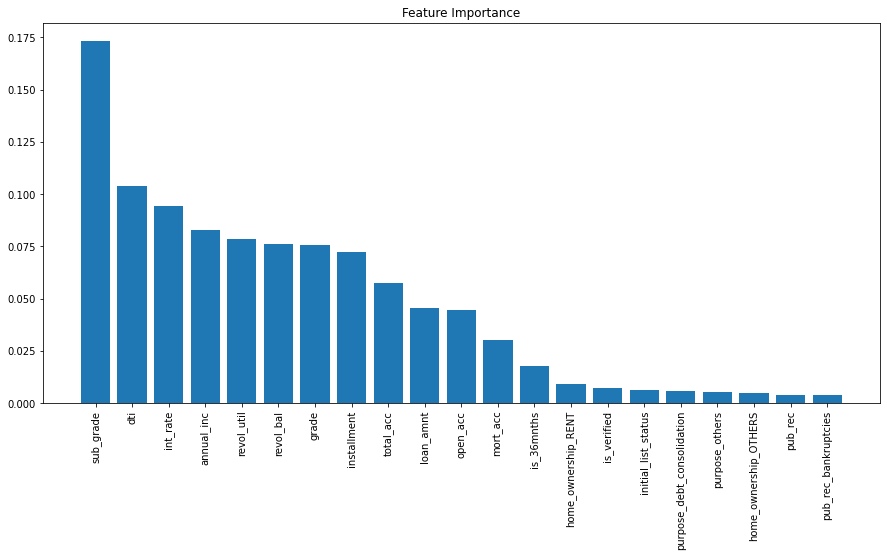

In [110]:
# Feature importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1] 
names = [x_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(x_train.shape[1]), importances[indices]) 
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

GBDTs

In [111]:
from xgboost import XGBClassifier

In [112]:
xgb=XGBClassifier(random_state=1)
fold=KFold(n_splits=5)
params={'n_estimators':[101,150],
        'max_depth':[4,5,7],
        'subsamples':[0.60,0.80],
        'colsample_bytree':[0.60,0.80],
        'learning_rate':[0.1,0.5,0.8]}

In [113]:
clf=RandomizedSearchCV(xgb,params,cv=fold,scoring='f1',n_jobs=-1)

In [114]:
clf.fit(x_train,y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(random_state=1), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8],
                                        'learning_rate': [0.1, 0.5, 0.8],
                                        'max_depth': [4, 5, 7],
                                        'n_estimators': [101, 150],
                                        'subsamples': [0.6, 0.8]},
                   scoring='f1')

In [115]:
clf.best_estimator_

XGBClassifier(colsample_bytree=0.8, learning_rate=0.8, max_depth=5,
              n_estimators=150, random_state=1, subsamples=0.6)

In [116]:
xgb=XGBClassifier(max_depth=7,colsample_bytree=0.8,subsamples=0.8,learning_rate=0.8,n_estimators=101)
xgb.fit(x_train,y_train)
print(xgb.score(x_train,y_train))
print(xgb.score(x_test,y_test))

0.9007273859390921
0.7749178093176169


In [117]:
ypred=xgb.predict(x_test)
confusion_matrix(y_test,ypred)

array([[9188,  818],
       [1989,  476]])

In [118]:
print(precision_score(y_test,ypred))
print(recall_score(y_test,ypred))

0.3678516228748068
0.19310344827586207


Insights:
1)As we move from Grade A to Grade G,the percent of people who are repaying their loans is decreasing and the percent of people who are defaulting is increasing.
2)Among the people who have repaid their loans,around 50% of people have taken loans for mortgage,folowed by rent and others.For the people who defaluted,around 50% of people have taken loans for rent,followed by mortgage and others.
3)Debt consolidation is the major purpose for which a customer takes a loan irrespective of whether he repays it or default.
4)The median loan amount for customers who have repaid their loans is 12000 while The median loan amount for customers who have defaulted their loans is 14000.Also the median annual income for customers who have repaid their loans is 65000 and the median annual income for customers who have defaulted their loans is 59000.
5)Since it is an imbalanced dataset-80% negatives and 20% positives,I have taken f1 score a the performance metric.Among the different models-Logistic Regression,Decision tree classifier,Random Forest classifier and Gbdt,Random Forest classifier is giving the highest f1 score of 0.41.
6)The most important features which will determine whether a customer will default or not are sub-grade,dti and annual income while the least 3 important features are home_ownership_others,purpose_others and pub rec bankrupcies.